**Importing libraries:**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from GMM import GaussianMixtureModel
from kmeans import KMeans
from utils.preprocessing import StandardScaler
from PCA import PCA

**Dataset:**

In [5]:
X = pd.read_csv("dataset/HTRU_2.csv")
X

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


**Scaling:**

In [6]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)


**K-Means:**

In [8]:
kmean = KMeans()
pred, means = kmean.fit(X, k = 5)
kmean.calculate_inertia(X)

44219.02219282487

**PCA:**

In [9]:
pca = PCA()
X_pca = pca.fit(X, 2)

**Plot for K-Means by using PCA:**

<function matplotlib.pyplot.show(close=None, block=None)>

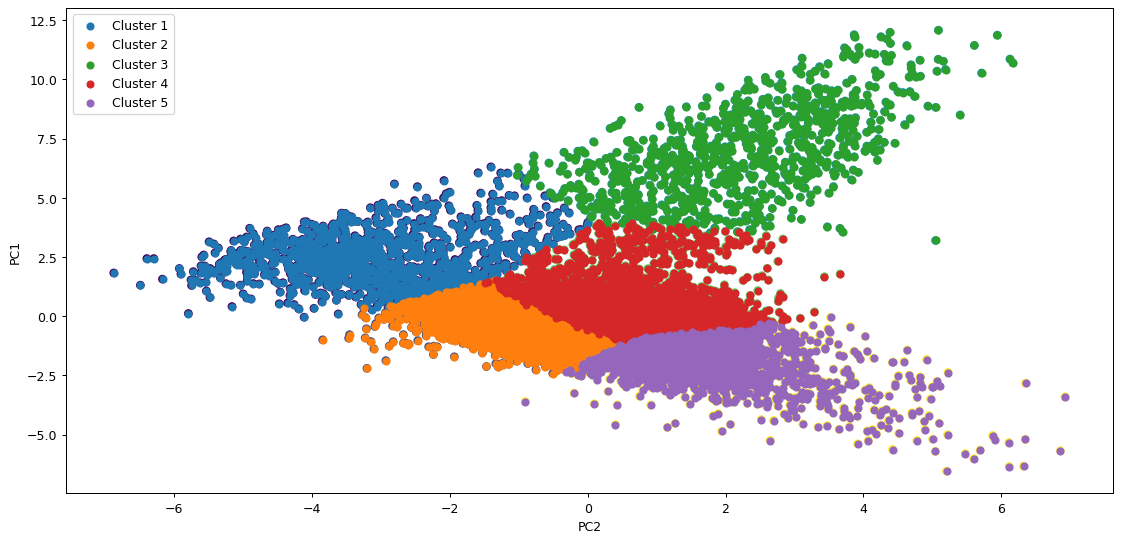

In [10]:
fig, ax = plt.subplots(figsize=(15, 7), dpi=90)
ax.scatter(X_pca[:,1], X_pca[:,0], c=pred)
plt.xlabel('PC2')
plt.ylabel('PC1')
legend_labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"]
ax.legend([plt.scatter(X_pca[:,1][pred==i],  X_pca[:,0][pred==i], s=30) for i in range(5)], legend_labels)
plt.show

**Gaussian Mixture Model:**

In [11]:
gmm = GaussianMixtureModel()
gmm.fit(X, k = 5)
pred = gmm.predict(X)

**Plot for Gaussian Mixture Model by using PCA:**

<function matplotlib.pyplot.show(close=None, block=None)>

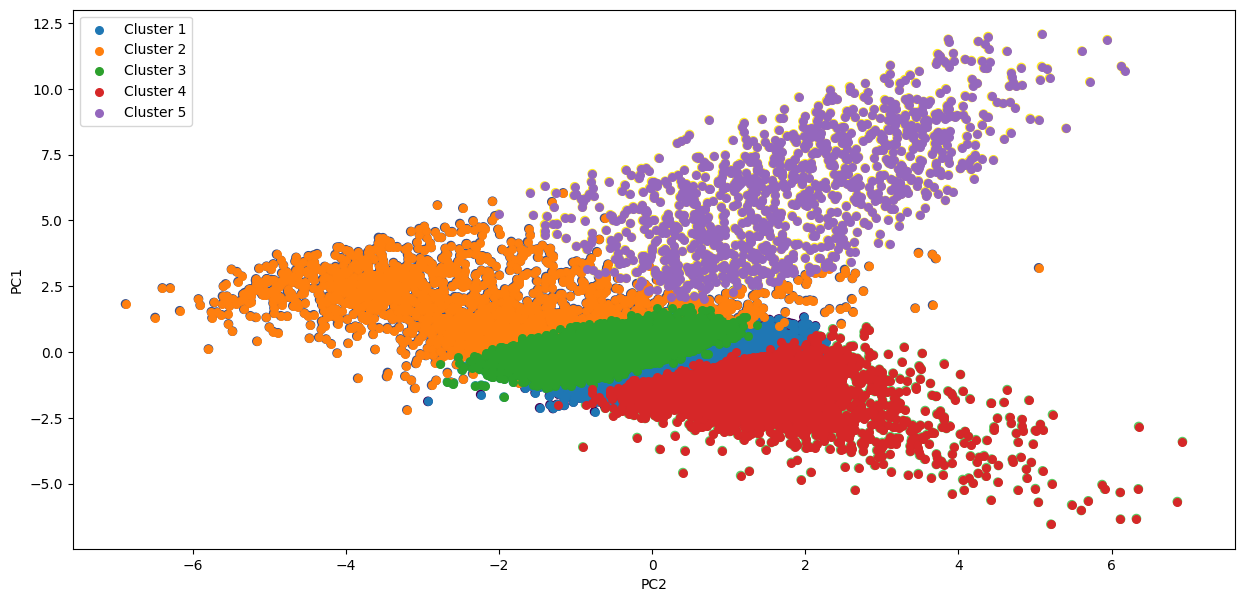

In [12]:
fig, ax = plt.subplots(figsize=(15, 7), dpi=100)
ax.scatter(X_pca[:,1], X_pca[:,0], c=pred)
plt.xlabel('PC2')
plt.ylabel('PC1')
legend_labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"]
ax.legend([plt.scatter(X_pca[:,1][pred==i],  X_pca[:,0][pred==i], s=30) for i in range(5)], legend_labels)
plt.show